# KNN Algorithm

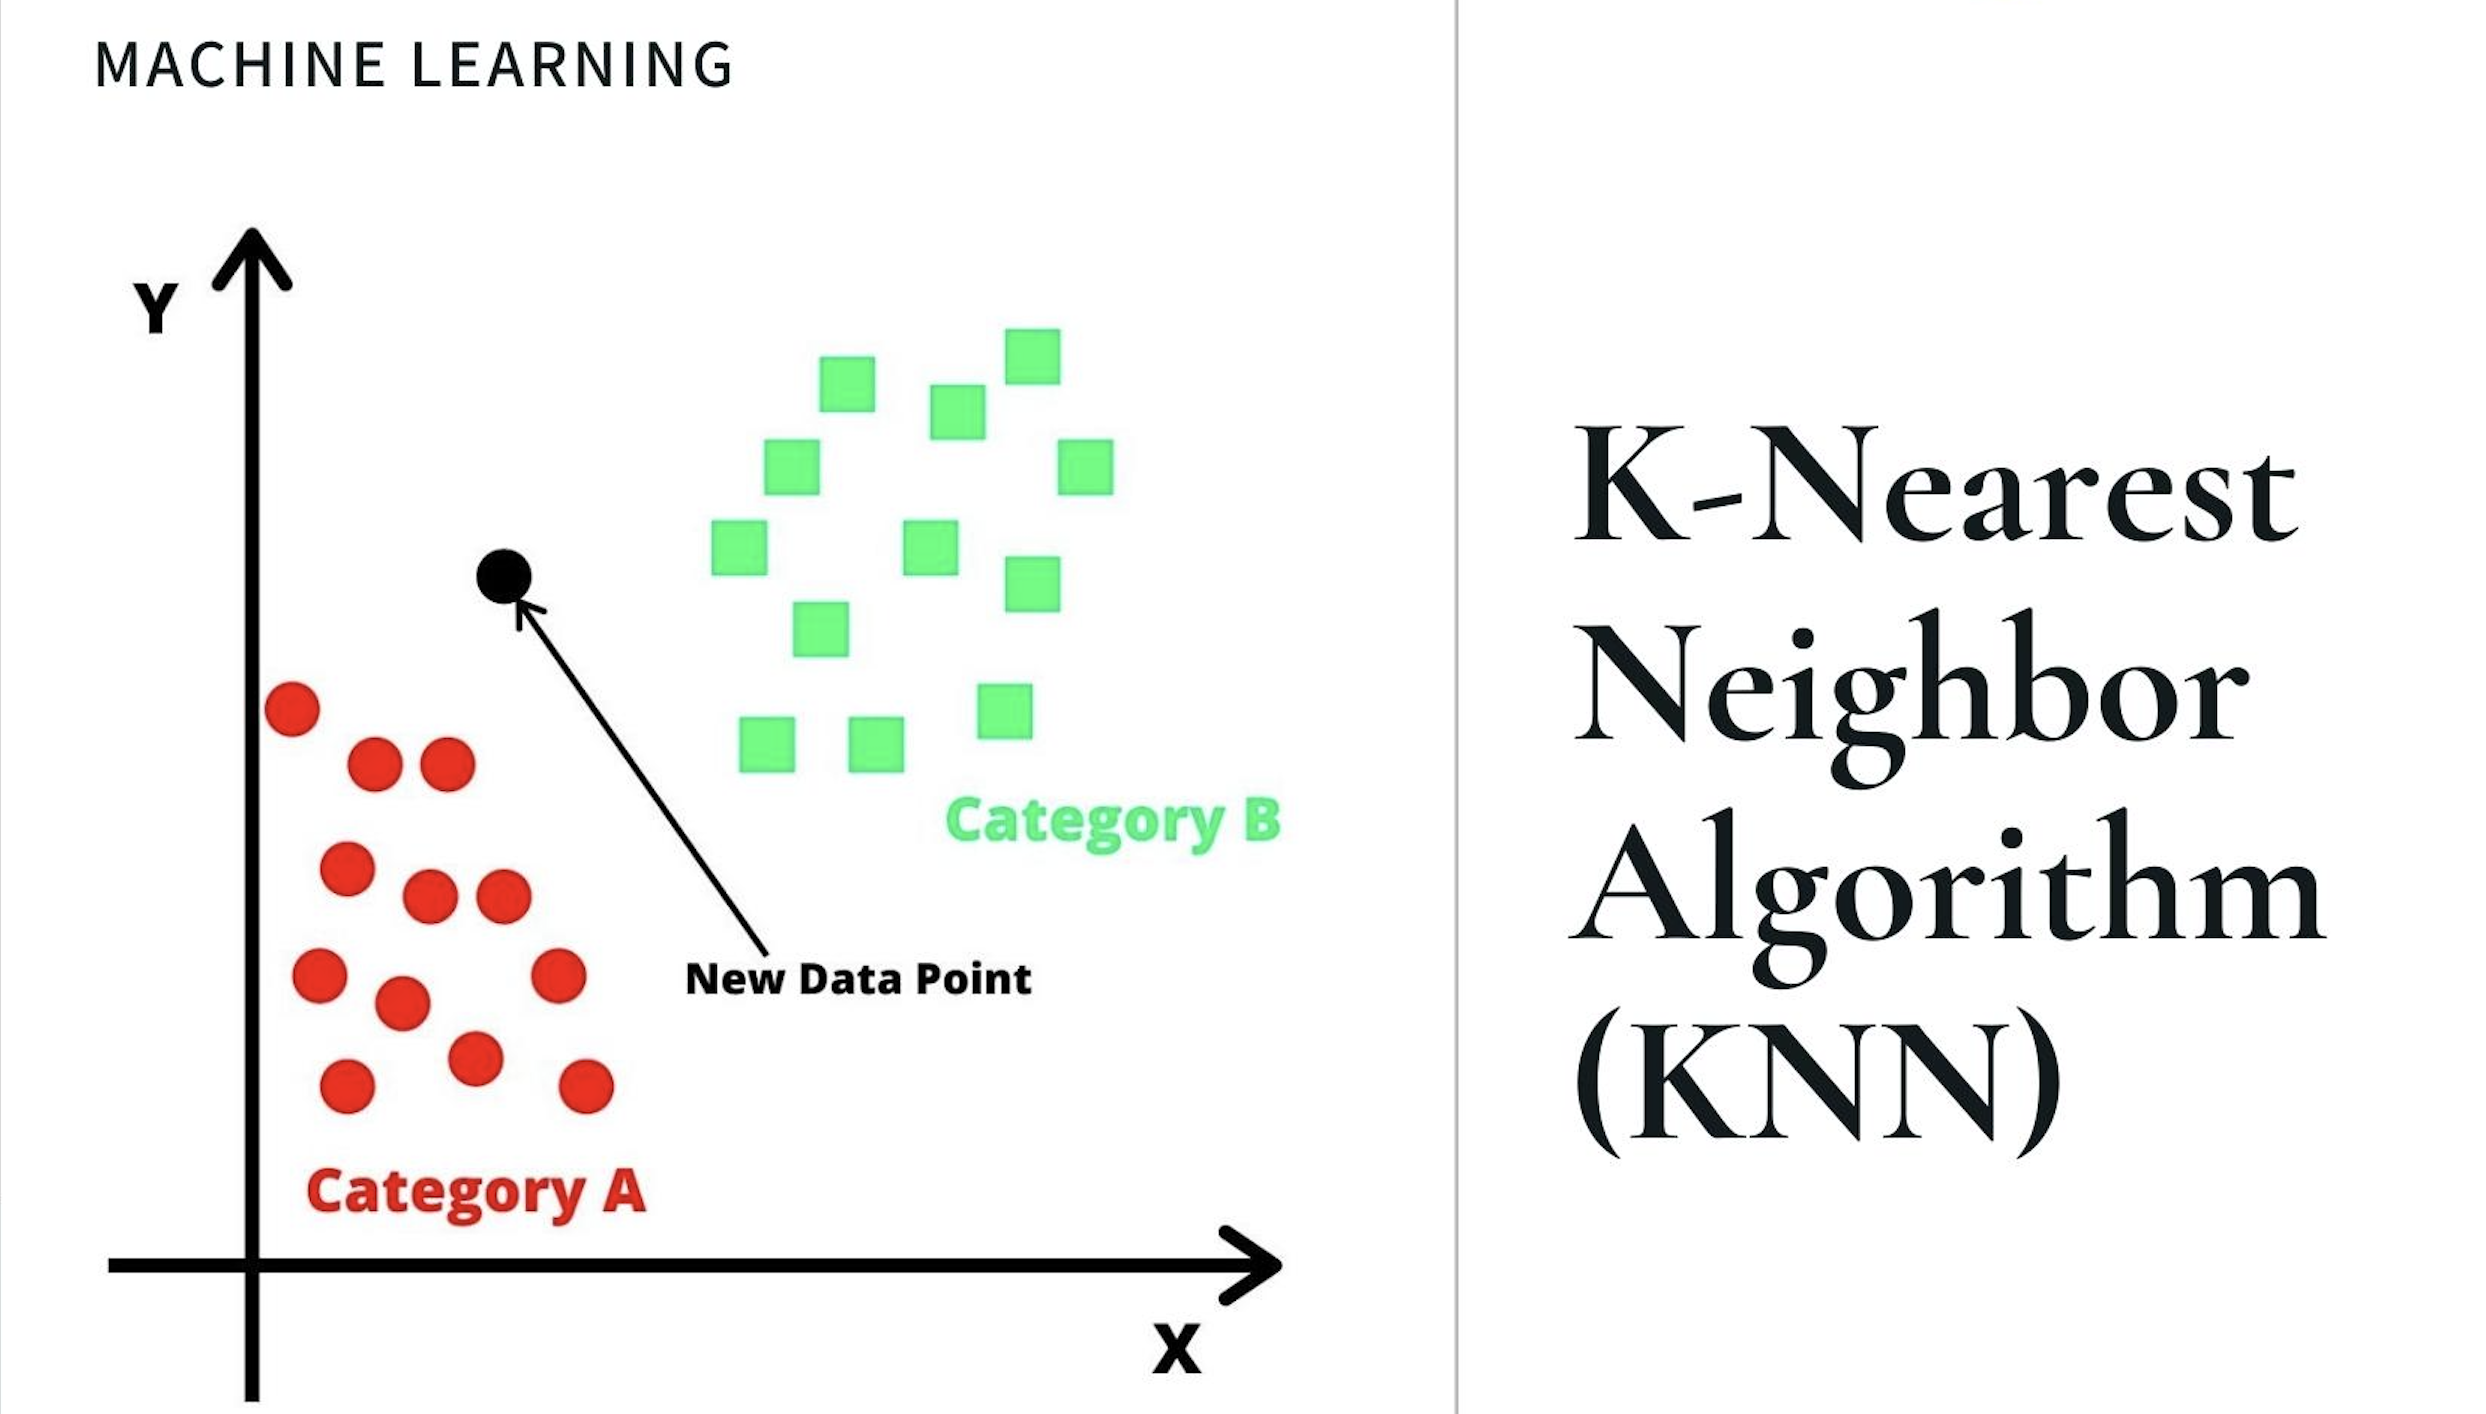

##### K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well..

##### -->Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

##### -->Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

### Working of KNN Algorithm


K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps −

Step 1 − For implementing any algorithm, we need dataset. So during the first step of KNN, we must load the training as well as test data.

Step 2 − Next, we need to choose the value of K i.e. the nearest data points. K should be odd integer.

Step 3 − For each point in the test data do the following −

    3.1 − Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

    3.2 − Now, based on the distance value, sort them in ascending order.

    3.3 − Next, it will choose the top K rows from the sorted array.

    3.4 − Now, it will assign a class to the test point based on most frequent class of these rows.

Step 4 − End

### Implementation in Python


As we know K-nearest neighbors (KNN) algorithm can be used for both classification as well as regression.
The following are the recipes in Python to use KNN as classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df2 = df.copy()
df2

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [7]:
df2 = df2.drop('User ID', axis='columns')
df2

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


Purchased Items count using countplot

/Users/shreyanthhg/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    257
1    143
Name: Purchased, dtype: int64

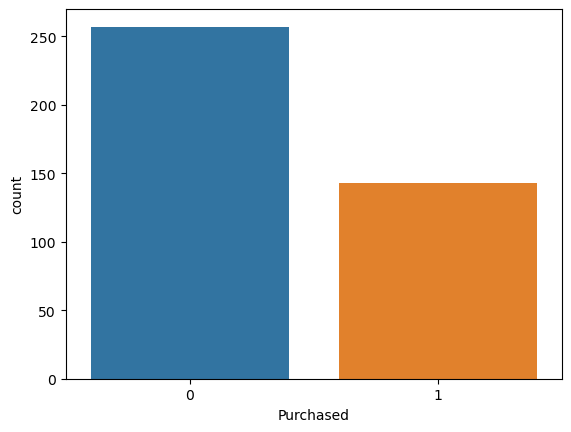

In [8]:
sns.countplot(df2['Purchased'])
df2.Purchased.value_counts()


Number of Male and Female who have and haven't purchsed using count using countplot

/Users/shreyanthhg/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Female    204
Male      196
Name: Gender, dtype: int64

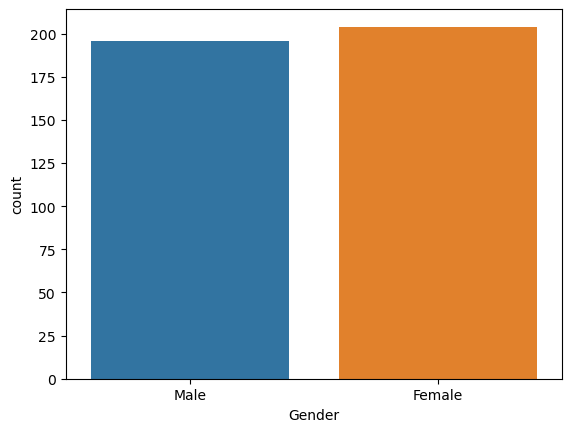

In [9]:
sns.countplot(df2['Gender'])
df2.Gender.value_counts()

Number of Male and Female who have and haven't purchsed using count using countplot

/Users/shreyanthhg/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Female    204
Male      196
Name: Gender, dtype: int64

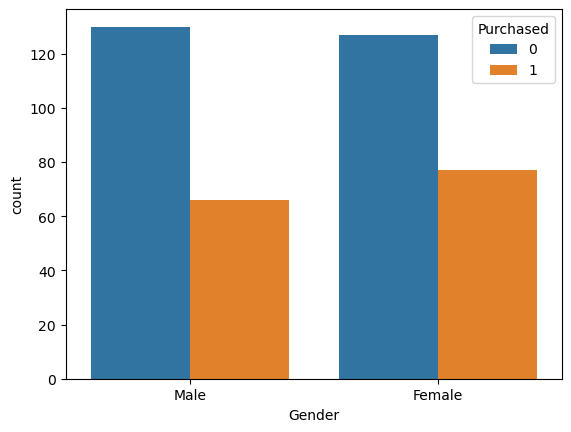

In [10]:
sns.countplot(df2['Gender'],hue=df2['Purchased'])
df2.Gender.value_counts()

Number of Male and Female who have and haven't purchsed depending on their salary using count using bar-graph

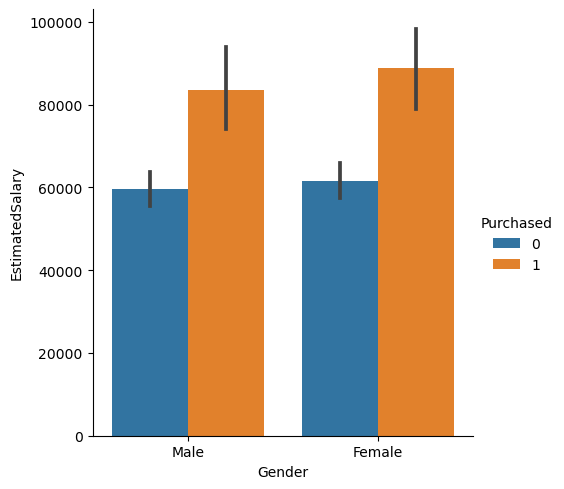

In [11]:
sns.catplot(data=df2, x="Gender", y="EstimatedSalary", hue="Purchased", kind="bar")

Line graph age vs Estimated Salary

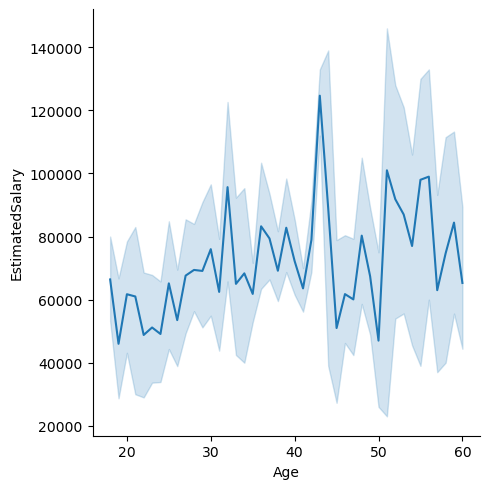

In [12]:
sns.relplot(data=df2, x="Age", y="EstimatedSalary", kind="line")

Line graph age vs Estimated Salary and also depicting Purched and not purchased

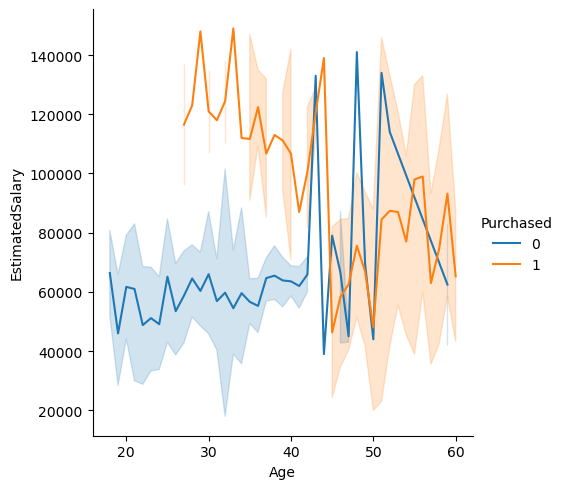

In [13]:
sns.relplot(data=df2, x="Age", y="EstimatedSalary", kind="line",hue='Purchased',)

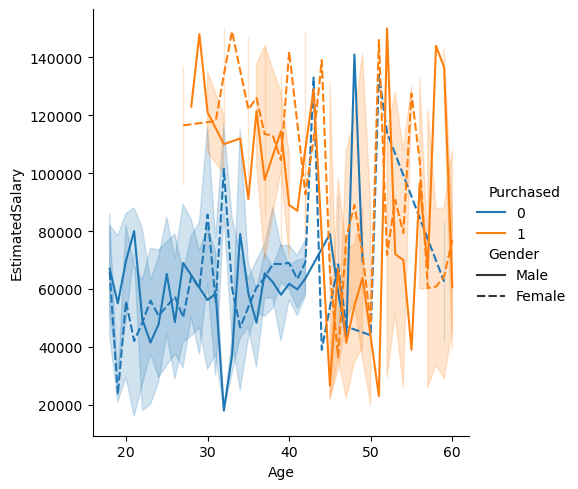

In [14]:
sns.relplot(data=df2, x="Age", y="EstimatedSalary", kind="line",hue='Purchased', style="Gender")

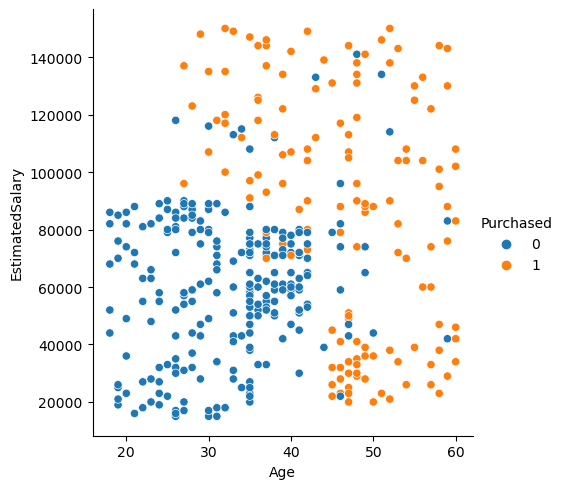

In [15]:
sns.relplot(data=df2, x="Age", y="EstimatedSalary", hue="Purchased")

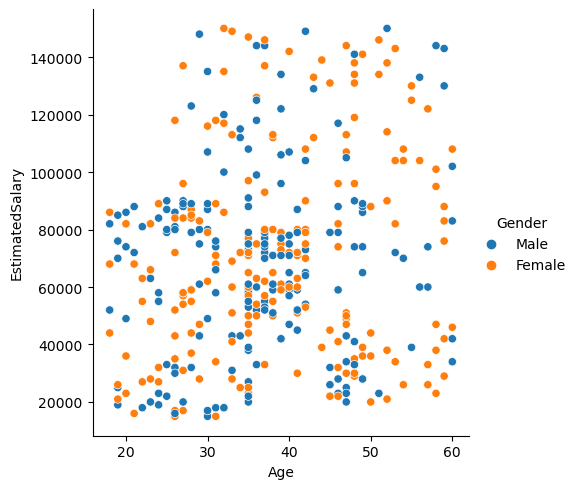

In [16]:
sns.relplot(data=df2, x="Age", y="EstimatedSalary", hue="Gender")

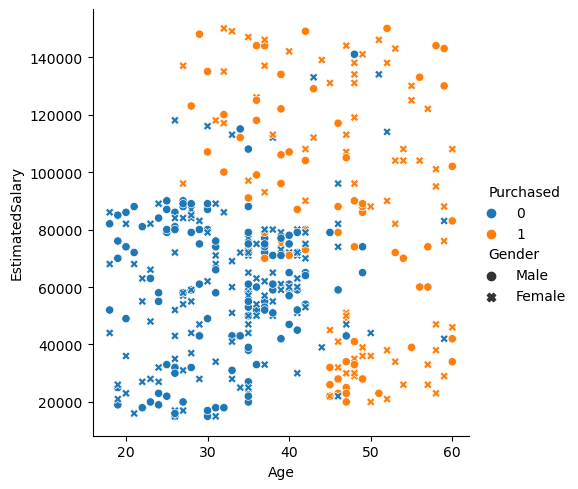

In [17]:
sns.relplot(data=df2,x="Age", y="EstimatedSalary", hue="Purchased", style="Gender")

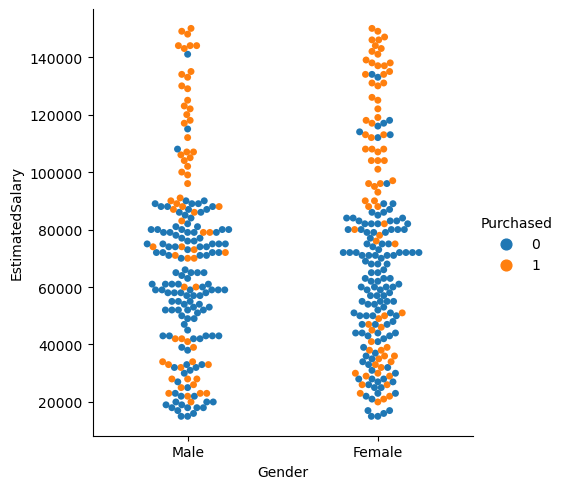

In [18]:
sns.catplot(data=df2, x="Gender", y="EstimatedSalary", kind="swarm",hue="Purchased")

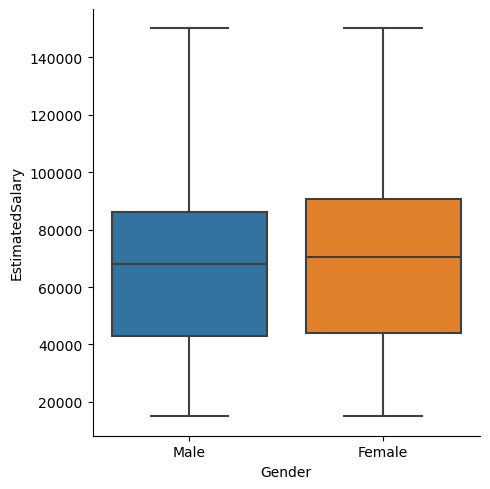

In [19]:
sns.catplot(data=df2, x="Gender", y="EstimatedSalary", kind="box")

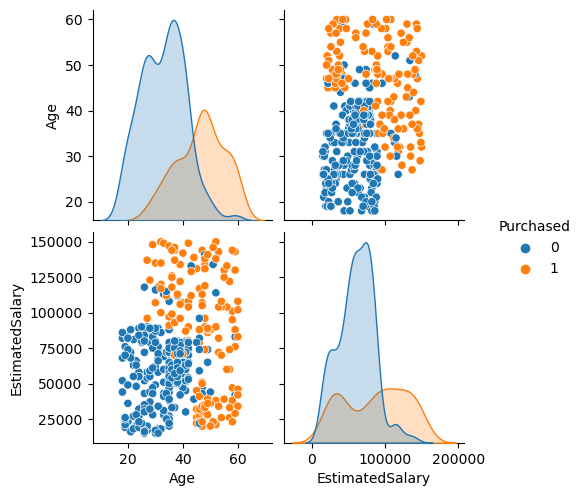

In [20]:
sns.pairplot(df2,hue='Purchased')

In [21]:
unique_values = pd.unique(df2['Gender'])
print(unique_values)
i = 0
for value in unique_values:
    df2['Gender'] = df2['Gender'].replace(value, i)
    i += 1

df2

['Male' 'Female']


,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [22]:
X = df.loc[:, 'Age':'EstimatedSalary']
y = df['Purchased']
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


# Without Sklearn 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

y_train = y_train.values
y_test = y_test.values


(300, 2) (300,)
(100, 2) (100,)


In [24]:
def user_fit_transform(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    a=((X - mean) / std)
    return a.to_numpy()
#     return a

In [25]:
X_train = user_fit_transform(X_train)
X_test = user_fit_transform(X_test)
X_test[0:5]

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566]])

In [26]:
from scipy.stats import mode

In [27]:
def user_confusion_matrix(y_true, y_pred):
    cm = [[0, 0], [0, 0]]
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] == 0:
            cm[0][0] += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            cm[0][1] += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            cm[1][0] += 1
        else:
            cm[1][1] += 1
    return cm

In [28]:
def user_accuracy(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)

In [29]:
def Lazy_KNN(X_train,X_test,y_train,y_test):
     
    scores=[]
    print('Selecting Best K Value \n \n ')
    for K in range(1,34,1):
    
        y_pred = []

        for x in X_test:
            points_distances = []

            for xx in X_train:
                distance = np.sqrt(np.sum((xx-x)**2))
                points_distances.append(distance)

            #choosing the k short eucledian distances
            indices = np.argpartition(points_distances, K)[:K]
            #choosing their corresponding values in target attribute
            labels = y_train[indices]
            #selecting best value for y_pred(predicting values)
            label = mode(labels)[0][0]
            y_pred.append(label)

        scores.append(user_accuracy(y_test, y_pred))
    
    best_K = 0
    best_acc = 0
    leng=len(scores)
    for k in range(leng):
        if(k%2==0):
            print('For K = %d, accuracy = %.2f%%' % (k+1, scores[k] * 100))
            if scores[k] > best_acc:
                best_acc = scores[k]
                best_K = k   
            
    plt.figure(figsize=(10,6))
    #plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
      #       markerfacecolor='red', markersize=10)
    plt.plot(range(1,34,1),scores,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Accuracy vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    
    print('\n',best_K+1," is the best K value")
    print('\n For K = %d, accuracy = %.2f%%\n' % ((best_K+1), scores[best_K] * 100))
    cm = user_confusion_matrix(y_test, y_pred)
    print('Confusion Matrix \n', cm)
    return y_pred

Selecting Best K Value 
 
 
For K = 1, accuracy = 88.00%
For K = 3, accuracy = 93.00%
For K = 5, accuracy = 93.00%
For K = 7, accuracy = 93.00%
For K = 9, accuracy = 93.00%
For K = 11, accuracy = 93.00%
For K = 13, accuracy = 93.00%
For K = 15, accuracy = 93.00%
For K = 17, accuracy = 93.00%
For K = 19, accuracy = 93.00%
For K = 21, accuracy = 93.00%
For K = 23, accuracy = 93.00%
For K = 25, accuracy = 93.00%
For K = 27, accuracy = 93.00%
For K = 29, accuracy = 93.00%
For K = 31, accuracy = 93.00%
For K = 33, accuracy = 93.00%

 3  is the best K value

 For K = 3, accuracy = 93.00%

Confusion Matrix 
 [[64, 4], [3, 29]]


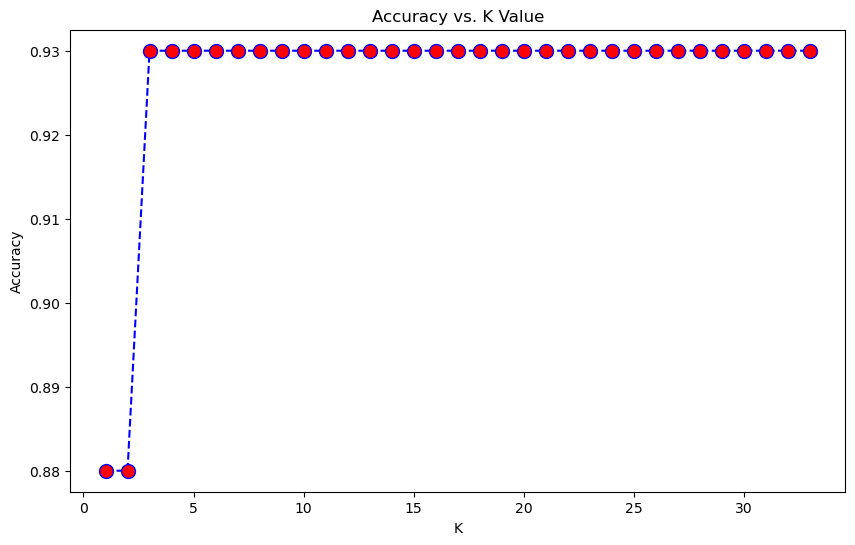

In [30]:
y_pred=Lazy_KNN(X_train,X_test,y_train,y_test)

# Confusion matrix returning values

In [31]:
def user_cm_values(y_true, y_pred):
    TN=0
    FP=0
    FN=0
    TP=0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] == 0:
            TN+=1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP+=1
        elif y_true[i] == 1 and y_pred[i] == 0:
            FN+=1
        else:
            TP+=1
    return TN,FP,FN,TP

In [32]:
TN,FP,FN,TP=user_cm_values(y_test, y_pred)
print(TN,FP,FN,TP)

64 4 3 29


# Precision

In [33]:
def precision(y_true,y_pred):
    TP=0
    FP=0
    for i in range(len(y_true)):
            if y_true[i] == y_pred[i] == 1:
                TP+=1
            elif y_true[i] == 0 and y_pred[i] == 1:
                FP+=1
    pre=TP/(TP+FP)
    print('Precision: ',pre)

In [34]:
precision(y_test,y_pred)

Precision:  0.8787878787878788


# Recall

In [35]:
def Recall(y_true,y_pred):
    TP=0
    FN=0
    for i in range(len(y_true)):
            if y_true[i] == y_pred[i] == 1:
                TP+=1
            elif y_true[i] == 1 and y_pred[i] == 0:
                FN+=1
    recall=TP/(TP+FP)
    print('Recall: ',recall)

In [36]:
Recall(y_test,y_pred)

Recall:  0.8787878787878788


# F1-score for a binary classifier

In [37]:
def f1_score(y_true,y_pred):
    TP=0
    FN=0
    FP=0
    for i in range(len(y_true)):
            if y_true[i] == y_pred[i] == 1:
                TP+=1
            elif y_true[i] == 1 and y_pred[i] == 0:
                FN+=1
            elif y_true[i] == 0 and y_pred[i] == 1:
                FP+=1
    r=TP/(TP+FP)
    p=TP/(TP+FP)
    f1_score=(2*r*p)/(p+r)
    print('F1-Score: ',f1_score)

In [38]:
f1_score(y_test,y_pred)

F1-Score:  0.8787878787878788


# Specificity

In [39]:
def Specificity(y_true,y_pred):
    TN=0
    for i in range(len(y_true)):
            if y_true[i] == y_pred[i] == 0:
                TN+=1
    x=y.value_counts()
    Spe=TN/x[0]
    print('Specificity: ',Spe)

In [40]:
Specificity(y_test,y_pred)

Specificity:  0.2490272373540856


# Using Sklearn

In [41]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [42]:
# we will test using k from 1 to 25
scores = []
for k in range(1, 26):
   
    knn = KNN(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

In [43]:
best_K = 0
best_acc = 0
leng=len(scores)
for k in range(leng):
    if k%2==0:
        print('For K = %d, accuracy = %.2f%%' % (k+1, scores[k] * 100))
        if scores[k] > best_acc:
            best_acc = scores[k]
            best_K = k
print(best_K+1)

For K = 1, accuracy = 88.00%
For K = 3, accuracy = 93.00%
For K = 5, accuracy = 93.00%
For K = 7, accuracy = 93.00%
For K = 9, accuracy = 93.00%
For K = 11, accuracy = 93.00%
For K = 13, accuracy = 93.00%
For K = 15, accuracy = 93.00%
For K = 17, accuracy = 93.00%
For K = 19, accuracy = 93.00%
For K = 21, accuracy = 93.00%
For K = 23, accuracy = 93.00%
For K = 25, accuracy = 93.00%
3


Text(0, 0.5, 'Accuracy')

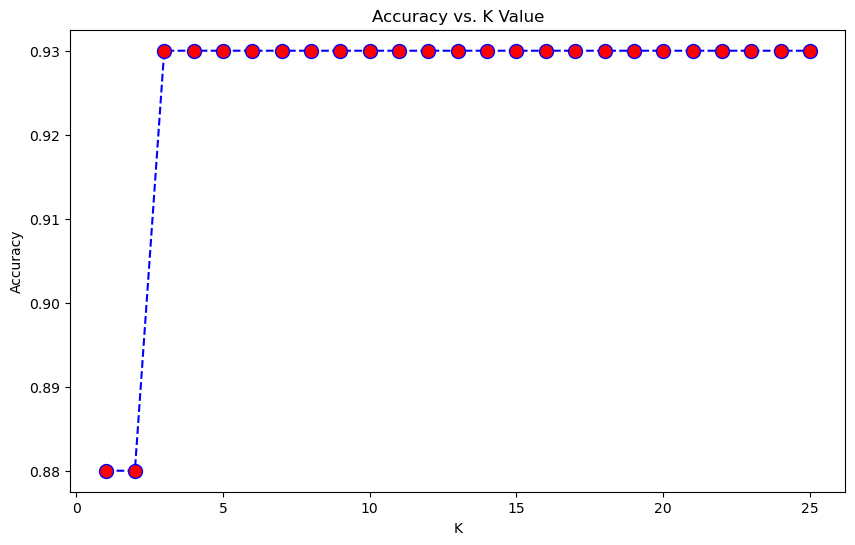

In [44]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,26),scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [45]:
knn = KNN(n_neighbors=best_K)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 8 24]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        68
           1       0.86      0.75      0.80        32

    accuracy                           0.88       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100



# Visualize the KNN Function

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


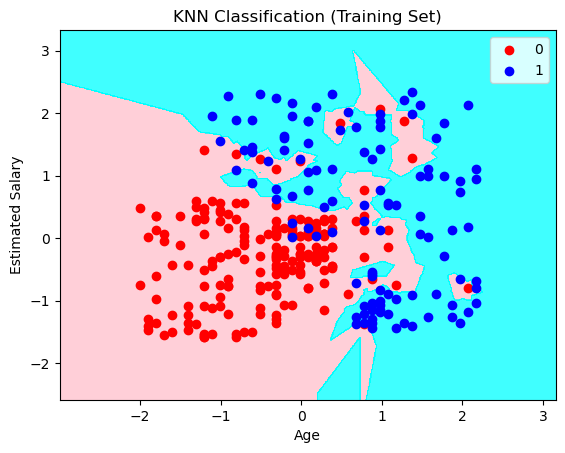

In [48]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('KNN Classification (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


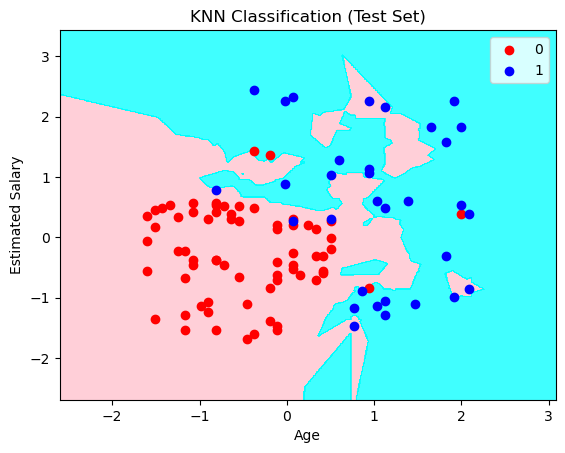

In [49]:
X_set, y_set= X_test, y_test

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j) 

plt.title('KNN Classification (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()